# Elbow Method
> The Elbow method is one of the most popular ways to find the optimal number of clusters. This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster. The formula to calculate the value of WCSS (for 3 clusters) is given below:

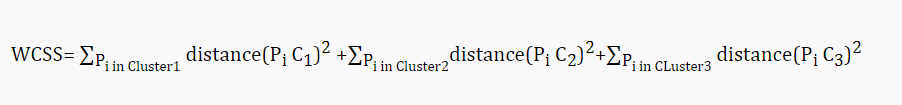

In [140]:
from IPython.display import Image
Image(filename='formula_WCSS.png')

In [141]:
import pandas as pd
import matplotlib.pyplot as plt

#### Now read the dataset from file using pandas

> Here we use the 'Mall Customers' dataset that I take from 'kaggle'

In [142]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


> Now Rename the table column name for the easy to access.


In [143]:
dataset.rename(columns={"Annual Income (k$)": 'income',"Spending Score (1-100)": "score"},inplace=True)
dataset

,CustomerID,Gender,Age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Check the Missing value and fill it

In [144]:
dataset.isnull().any()

CustomerID    False
Gender        False
Age           False
income        False
score         False
dtype: bool

In [145]:
# or
dataset.isnull().sum()

CustomerID    0
Gender        0
Age           0
income        0
score         0
dtype: int64

> There are no missing value so, we don't need to handle it.

### Now We draw the pair plot for the visualisation.

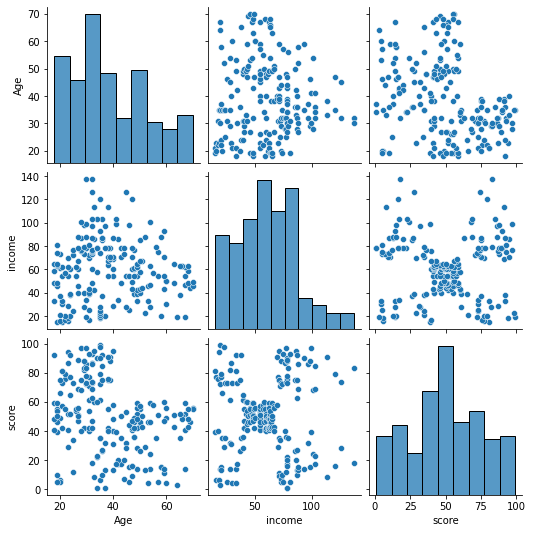

In [146]:
seaborn.pairplot(dataset[{"Age",'income','score'}])


### Now Calculate WCSS (Within Cluster Sum of Squares)


In [147]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1,15):
    km = KMeans(n_clusters=k)
    km.fit(dataset[['income','score']])
    wcss.append(km.inertia_)
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30227.60651315203,
 25018.576334776328,
 21850.16528258562,
 19704.48480782503,
 17549.699291912577,
 15838.717785514093,
 14307.697990031795,
 13402.633427099223]

### Now plot graph for wcss

Text(0, 0.5, 'Sum of squared error')

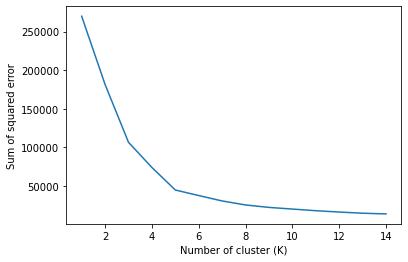

In [148]:
plt.plot(range(1,15), wcss)
plt.xlabel("Number of cluster (K)")
plt.ylabel("Sum of squared error")

> where abrupt decrease will stop, this point will be the cluster point

> In the above graph, on point 5 the abrupt decreases were stopped. so the cluster is 5


Now see the another example

In [149]:
wcss = []
for k in range(1,10):
    km = KMeans(n_clusters=k)
    km.fit(dataset[['Age','score']])
    wcss.append(km.inertia_)
wcss

[171535.50000000003,
 75949.15601023012,
 45840.67661610871,
 28165.583566629342,
 23830.24505228461,
 19628.819863023316,
 15514.193134351033,
 13054.172145982677,
 11587.075381263614]

Text(0, 0.5, 'Sum of squared error')

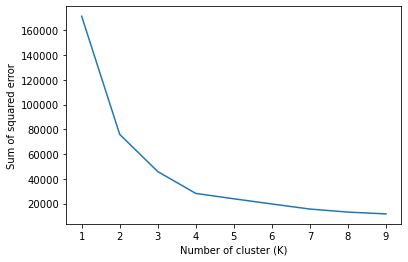

In [150]:
plt.plot(range(1,10), wcss)
plt.xlabel("Number of cluster (K)")
plt.ylabel("Sum of squared error")

> In the above graph, on point 4 the abrupt decreases were stopped. so the cluster is 4

### Now perform K-Mean clustering in "Age vs score"

In [151]:
k_mean = KMeans(n_clusters=4)
k_mean.fit(dataset[["score","Age"]])
dataset["Age_cluster"] = k_mean.labels_
dataset

,CustomerID,Gender,Age,income,score,Age_cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,0


<AxesSubplot:xlabel='Age', ylabel='score'>

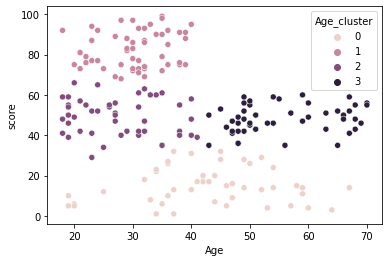

In [152]:
seaborn.scatterplot(x='Age',y="score",hue='Age_cluster', data=dataset)

##### You're seeing 4 different clusters with different colors.